# t-Tests

***

In [4]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [5]:
def normal_pdf(x, mu=0.0, sigma=1.0): # standard paras
  # sigma is the standard deviation
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [6]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [7]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [8]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

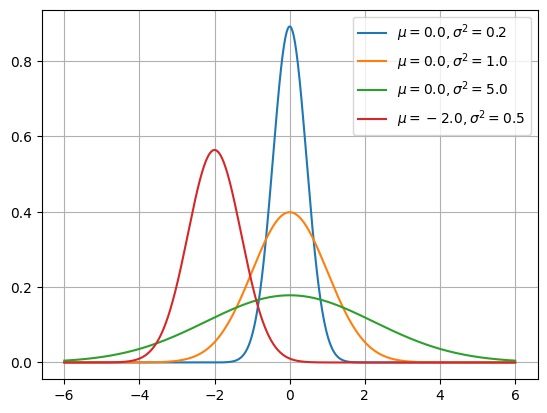

In [9]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
# reference to the labels
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  # putting a latex into the labels
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

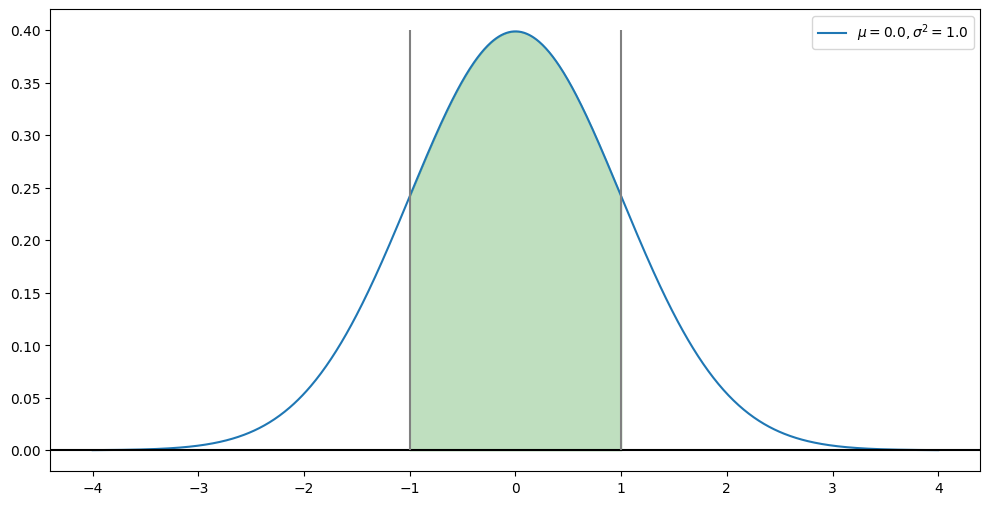

In [10]:
# Create a blank plot.
# setting the size of overall graph
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values.
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis.
ax.axhline(0.0, color='black')

# Add vertical lines.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)


# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)

# Add a legend.
ax.legend();

In [11]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


## Normal Data

***

In [12]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

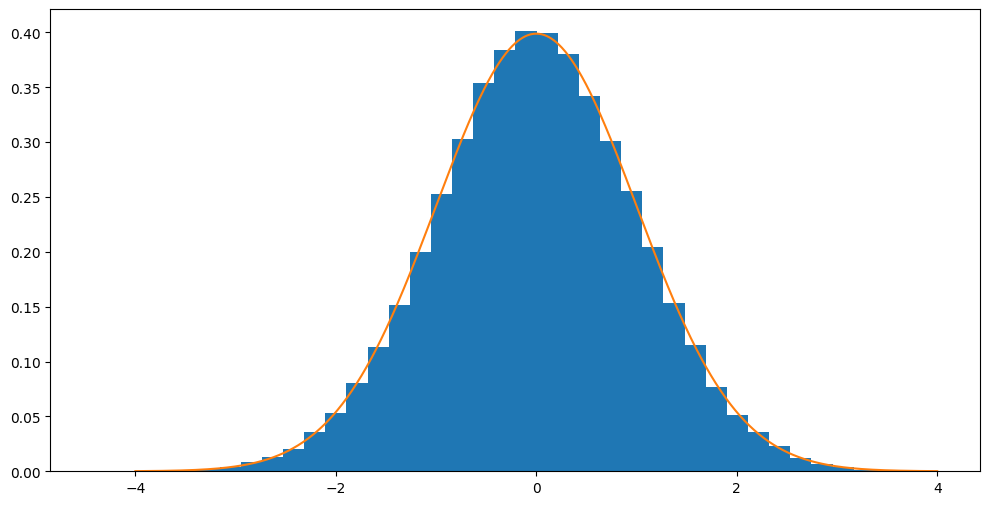

In [13]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
# see is the random data normally distributed
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [14]:
# Generate some random normal data.
# parameters rows and columns

# sample distribution 1/sqaure root of your samples

random_data = np.random.standard_normal((10000, 25))

# Show.
random_data

array([[ 0.08254549, -0.77161162,  0.39213192, ..., -1.23878717,
        -0.22224809,  0.8541952 ],
       [ 0.09495096,  0.26013438, -0.18047241, ..., -2.44150055,
        -1.5751126 ,  0.48052466],
       [-0.61086598, -1.42203853, -0.466592  , ...,  1.09245533,
         0.56408781, -1.79456017],
       ...,
       [-0.47380046,  0.81407199, -0.18355874, ...,  0.39944121,
         1.241533  , -2.26764835],
       [-0.80659133,  0.52663997,  1.27742026, ...,  0.20955722,
         0.38969537, -0.10139258],
       [-0.50043629,  1.21535939, -0.22521021, ..., -0.72521077,
        -2.12096946,  0.66710853]])

In [15]:
# Mean across the rows.
random_data.mean(axis=1)

array([-0.15933996, -0.33018905, -0.38168989, ...,  0.14026521,
       -0.03737482, -0.21582651])

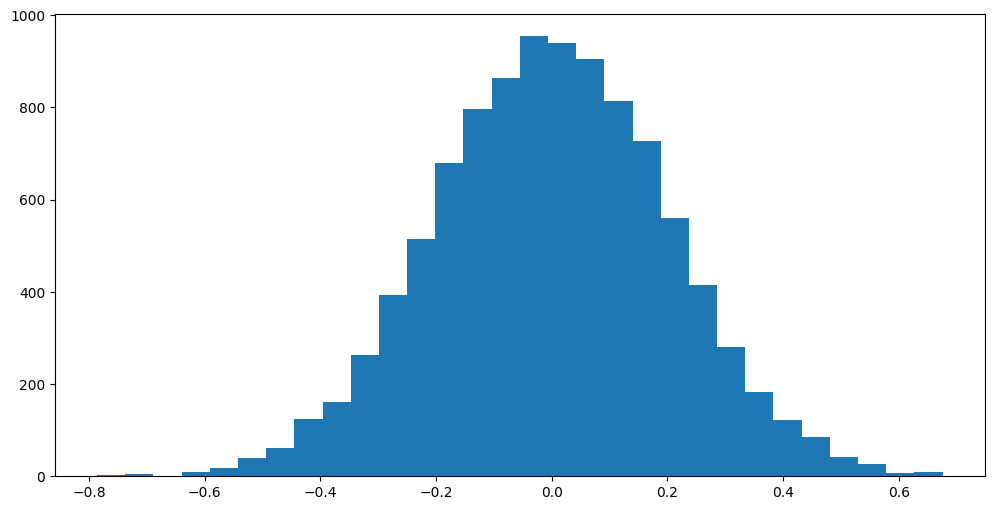

In [16]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

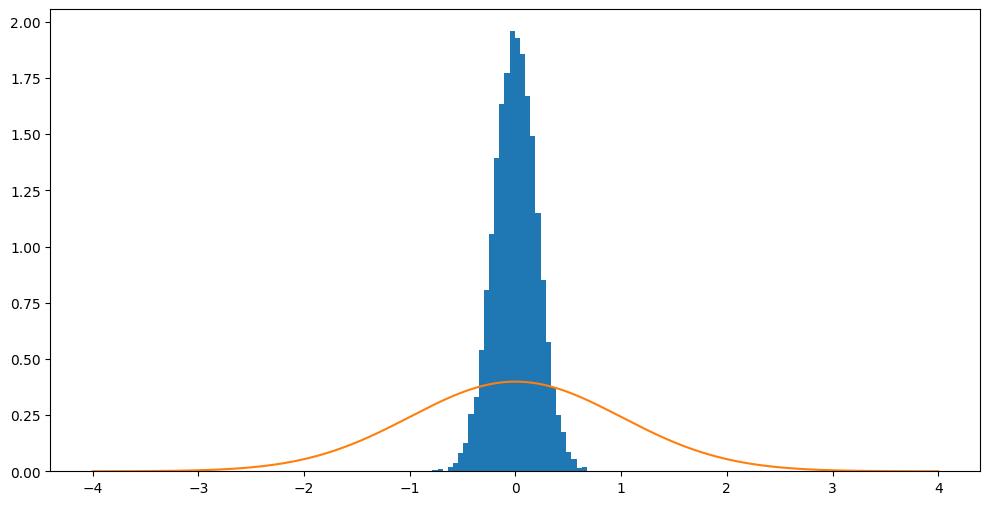

In [17]:
# make the guess of the distribution of 0.2 based off the
# sample distribution

# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y);

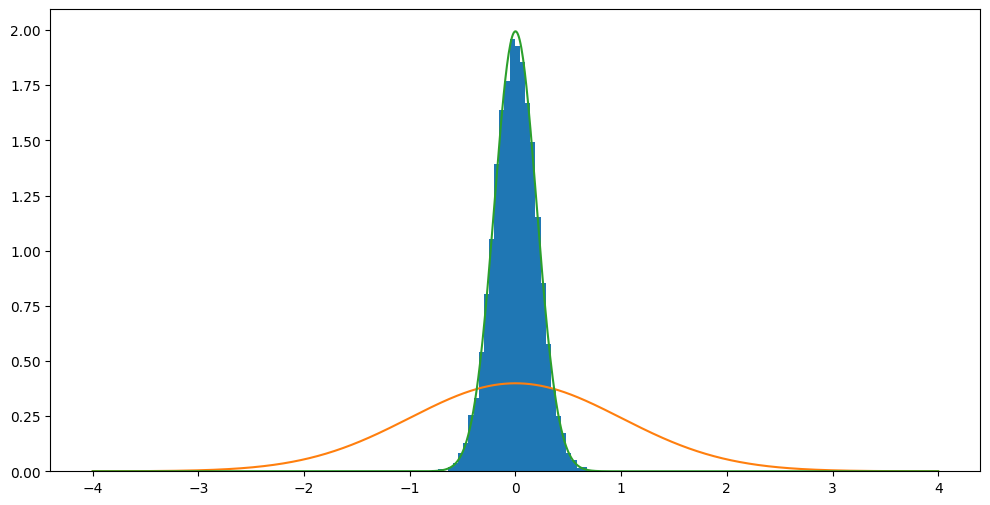

In [18]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
x = np.linspace(-4.0, 4.0, 1001)
y = normal_pdf(x)
ax.plot(x, y)

# Plot normal distribution with mu = 0.0 and sigma = 0.2.
y = normal_pdf(x, mu=0.0, sigma=0.2)
ax.plot(x, y);

## Random Normal

***

In [19]:
# Let's pick a random mean value.
random_mu = np.random.uniform(-3.0, 3.0)

# Show.
# random_mu

In [20]:
# Generate some random normal data with this unknown mu.
random_data = np.random.normal(random_mu, 1.0, (10000, 25))

# Show.
random_data

array([[-0.27721981,  0.64981322,  1.9866709 , ...,  1.84580283,
         0.53931266,  0.61996899],
       [ 0.84740472, -1.56538011, -0.84975021, ..., -0.91782772,
         0.49182009, -1.07240166],
       [ 1.06554268, -0.87291758,  0.56407179, ..., -0.27069494,
         0.19859664,  0.7718393 ],
       ...,
       [ 0.41420604,  1.33485443,  1.35165593, ...,  0.08054126,
         0.72979504,  0.35173624],
       [-0.73015965,  0.84921818,  1.73746724, ..., -0.07234896,
        -0.52323713,  2.1942805 ],
       [-0.88038306,  0.86897846,  1.46472214, ...,  0.8195096 ,
         0.1101653 , -0.08130715]])

(array([0.00587668, 0.00391778, 0.01567114, 0.02938338, 0.04701342,
        0.11557465, 0.15083471, 0.31146388, 0.4838464 , 0.76200911,
        1.03037735, 1.31245784, 1.58474387, 1.95105673, 2.02549464,
        1.98239901, 1.73949636, 1.58474387, 1.41432024, 1.00687064,
        0.74437907, 0.5347776 , 0.33301169, 0.2037248 , 0.11949243,
        0.0509312 , 0.02350671, 0.00979446, 0.00783557, 0.00391778]),
 array([0.09241981, 0.14346906, 0.19451832, 0.24556758, 0.29661684,
        0.3476661 , 0.39871536, 0.44976462, 0.50081388, 0.55186313,
        0.60291239, 0.65396165, 0.70501091, 0.75606017, 0.80710943,
        0.85815869, 0.90920795, 0.9602572 , 1.01130646, 1.06235572,
        1.11340498, 1.16445424, 1.2155035 , 1.26655276, 1.31760202,
        1.36865128, 1.41970053, 1.47074979, 1.52179905, 1.57284831,
        1.62389757]),
 <BarContainer object of 30 artists>)

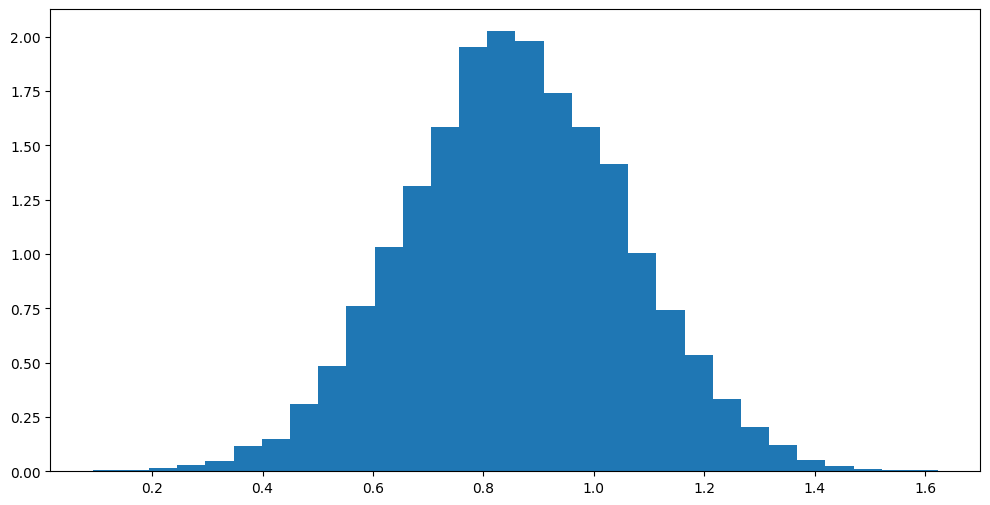

In [21]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

In [22]:
# Estimate random_mu from above histogram.
# Now look at the value.
random_mu

0.8642987442064136

In [23]:
# A random sample of size 50.
sample = np.random.normal(random_mu, 1.0, 50)

# Show.
sample

array([ 2.25005035, -0.70861456,  1.70103361,  1.18674743,  1.45941712,
        0.22935814,  0.13455175,  0.62799465,  1.89064732,  0.16108547,
        1.44968536,  1.13358807,  1.824869  , -0.5389103 ,  0.7566162 ,
        1.26181482, -1.77014355,  0.44970769, -0.62189898, -0.65719775,
        0.23723102,  0.51031275,  0.0876426 ,  0.84842229, -0.18993295,
        1.31479958, -0.46487556, -0.48163126,  1.88631198,  0.8652843 ,
        1.49611469,  0.17248934, -0.77028752,  1.26692164,  1.39500542,
        1.88622018,  1.85642712,  0.4946127 ,  0.72651669, -0.94452324,
        1.46855738, -0.32050798,  2.4532627 ,  2.06387384,  1.81517549,
        0.31308038,  1.73896881,  1.56619026,  0.46853764,  1.06204977])

In [24]:
# Calculate the mean of the sample.
sample.mean()

0.7408530383515373

## Independent Samples t-test

***

In [25]:
# Load Iris.
df = pd.read_csv('data/iris.csv')

# Show.
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/iris.csv'

In [ ]:
# Setosa petal length.
sample_a = df[df['class'] == 'setosa']['petal_length'].to_numpy()

sample_a

In [ ]:
# Virginica petal length.
sample_b = df[df['class'] == 'virginica']['petal_length'].to_numpy()

sample_b

In [ ]:
# t-test.
ss.ttest_ind(sample_a, sample_b)

***

## End